In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pymystem3 import Mystem
from nltk.corpus import stopwords
nltk.download('stopwords')
def lemmatize(text):
    m = Mystem()
    lem_arr = m.lemmatize(text)
    return "".join(lem_arr)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\14675\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Читаем лемматизированные записи из множества файлов
count = 1000
max_count = 824000
df_l = pd.DataFrame()
while count <= max_count:
    df_1000 = pd.read_csv(r"lemmatized"+str(count)+".csv", 
                 on_bad_lines='warn', 
                 delimiter=';',
                 na_values='',
                 dtype='str'
                )
    df_l = pd.concat([df_l, df_1000], ignore_index=True)
    count += 1000
df_l

,Unnamed: 0,id,name,ntd,ntd_m,ens,ens_id,source,lemmatized_name
0,1000,1000193915,Круг h11-МД-25 ГОСТ 7417-75 / 10Х11Н23Т3МР (ЭИ...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-МД-25 гост 7417-75 / 10Х11Н23Т3МР (ЭИ...
1,1001,1000193940,Круг h11-НД-6 ГОСТ 7417-75 / 12Х18Н9Т-Б ТУ 14-...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-НД-6 гост 7417-75 / 12Х18Н9Т-б тот 14...
2,1002,1000193920,Круг h11-МД-10 ГОСТ 7417-75 / 20Х13-В ТУ 14-1-...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-МД-10 гост 7417-75 / 20Х13-в тот 14-1...
3,1003,1000193934,Круг h11-НД-12 ГОСТ 7417-75 / 12Х18Н9Т-Б ТУ 14...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-НД-12 гост 7417-75 / 12Х18Н9Т-б тот 1...
4,1004,1000193912,Круг h11-МД-17 ГОСТ 7417-75 / 10Х11Н23Т3МР (ЭИ...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-МД-17 гост 7417-75 / 10Х11Н23Т3МР (ЭИ...
...,...,...,...,...,...,...,...,...,...
823739,824739,7914370148.000,"УПЛОТНИТЕЛЬ,",NaN,NaN,NaN,NaN,candidate,"уплотнитель,\n"
823740,824740,9990297149.000,"ФИЛЬТР ВОЗДУШНЫЙ,",NaN,NaN,NaN,NaN,candidate,"фильтр воздушный,\n"
823741,824741,9990297149.200,"Фильтр салонный,",NaN,NaN,NaN,NaN,candidate,"фильтр салонный,\n"
823742,824742,9990297210.000,"ФИЛЬТР ТОПЛИВНЫЙ,",NaN,NaN,NaN,NaN,candidate,"фильтр топливный,\n"


In [4]:
corpus = list(df_l['lemmatized_name'])

# Cоздаём N-граммы из 2-х слов
count_vect = CountVectorizer()
bow1 = count_vect.fit_transform(corpus)
print("Размер мешка без учёта стоп-слов:", bow1.shape)

#Исключаем стоп слова
stop_words = list(stopwords.words('russian'))
count_vect = CountVectorizer(stop_words=stop_words)
bow2 = count_vect.fit_transform(corpus)
print("Размер мешка с учётом стоп-слов:", bow2.shape)

#N-граммы по 2 слова
count_vect = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
bow3 = count_vect.fit_transform(corpus)
print("Размер мешка ду-грамм с учётом стоп-слов:", bow3.shape)

Размер мешка без учёта стоп-слов: (823744, 147302)
Размер мешка с учётом стоп-слов: (823744, 147259)
Размер мешка ду-грамм с учётом стоп-слов: (823744, 515031)


In [5]:
#Построение кластеров
distortion = []

K = range(2, 2022, 20)
for k in K:
    print(k)
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(bow3)
    distortion.append(model.inertia_)

2
22
42
62
82
102
122
142
162
182
202
222
242
262
282
302
322
342
362
382
402
422
442
462
482
502
522
542
562
582
602
622
642
662
682
702
722
742
762
782
802
822
842
862
882
902
922
942
962
982
1002
1022
1042
1062
1082
1102
1122
1142
1162
1182
1202
1222
1242
1262
1282
1302
1322
1342
1362
1382
1402
1422
1442
1462
1482
1502
1522
1542
1562
1582
1602
1622
1642
1662
1682
1702
1722
1742
1762
1782
1802
1822
1842
1862
1882
1902
1922
1942
1962
1982
2002


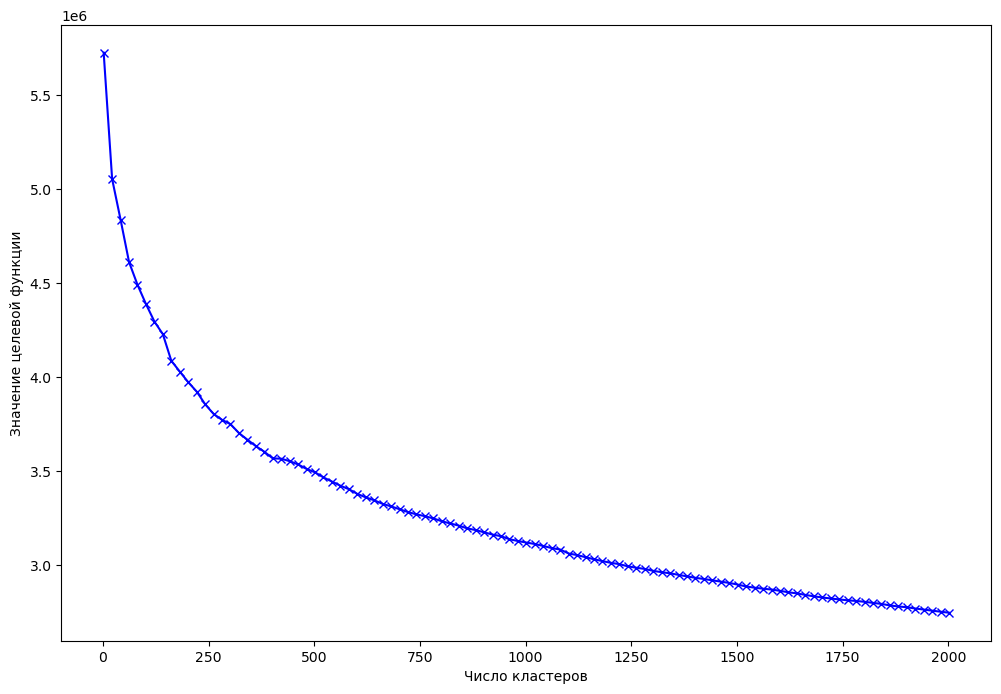

Целевая функция (конечное значение):
2747376.2391593647
Количество итераций (конечное значение):
20


In [6]:
# Построение графика целевой функции по методу локтя
plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

print("Целевая функция (конечное значение):")
print(model.inertia_)

print("Количество итераций (конечное значение):")
print(model.n_iter_)

#Add cluster labels to the DataFrame
df_l['cluster'] = model.labels_

In [7]:
# Display the DataFrame with cluster labels
display(df_l)

#Оставляем только те кластера, где есть и master и candidate
# Step 1: Identify clusters with more than one unique source
clusters_with_multiple_sources = df_l.groupby('cluster')['source'].nunique()
clusters_to_keep = clusters_with_multiple_sources[clusters_with_multiple_sources > 1].index

# Step 2: Filter the DataFrame
filtered_df = df_l[df_l['cluster'].isin(clusters_to_keep)]

# Display the filtered DataFrame
display(filtered_df)
filtered_df.to_csv('filtered_2022.csv', encoding='utf-8-sig', sep=';')

,Unnamed: 0,id,name,ntd,ntd_m,ens,ens_id,source,lemmatized_name,cluster
0,1000,1000193915,Круг h11-МД-25 ГОСТ 7417-75 / 10Х11Н23Т3МР (ЭИ...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-МД-25 гост 7417-75 / 10Х11Н23Т3МР (ЭИ...,1821
1,1001,1000193940,Круг h11-НД-6 ГОСТ 7417-75 / 12Х18Н9Т-Б ТУ 14-...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-НД-6 гост 7417-75 / 12Х18Н9Т-б тот 14...,524
2,1002,1000193920,Круг h11-МД-10 ГОСТ 7417-75 / 20Х13-В ТУ 14-1-...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-МД-10 гост 7417-75 / 20Х13-в тот 14-1...,462
3,1003,1000193934,Круг h11-НД-12 ГОСТ 7417-75 / 12Х18Н9Т-Б ТУ 14...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-НД-12 гост 7417-75 / 12Х18Н9Т-б тот 1...,524
4,1004,1000193912,Круг h11-МД-17 ГОСТ 7417-75 / 10Х11Н23Т3МР (ЭИ...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-МД-17 гост 7417-75 / 10Х11Н23Т3МР (ЭИ...,1821
...,...,...,...,...,...,...,...,...,...,...
823739,824739,7914370148.000,"УПЛОТНИТЕЛЬ,",NaN,NaN,NaN,NaN,candidate,"уплотнитель,\n",56
823740,824740,9990297149.000,"ФИЛЬТР ВОЗДУШНЫЙ,",NaN,NaN,NaN,NaN,candidate,"фильтр воздушный,\n",56
823741,824741,9990297149.200,"Фильтр салонный,",NaN,NaN,NaN,NaN,candidate,"фильтр салонный,\n",56
823742,824742,9990297210.000,"ФИЛЬТР ТОПЛИВНЫЙ,",NaN,NaN,NaN,NaN,candidate,"фильтр топливный,\n",56


,Unnamed: 0,id,name,ntd,ntd_m,ens,ens_id,source,lemmatized_name,cluster
2,1002,1000193920,Круг h11-МД-10 ГОСТ 7417-75 / 20Х13-В ТУ 14-1-...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-МД-10 гост 7417-75 / 20Х13-в тот 14-1...,462
5,1005,1000199765,Лак НЦ-223 ГОСТ 4976-83,ГОСТ 4976-83,NaN,Лаки,01.09.01.01,master,лак НЦ-223 гост 4976-83\n,56
10,1010,1000193930,Круг h11-НД-10 ГОСТ 7417-75 / 20Х13-Б ТУ 14-1-...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-НД-10 гост 7417-75 / 20Х13-б тот 14-1...,123
11,1011,1000193942,Круг h11-МД-14 ГОСТ 7417-75 / 20Х13-В ТУ 14-1-...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-МД-14 гост 7417-75 / 20Х13-в тот 14-1...,462
12,1012,1000193936,Круг h11-НД-12 ГОСТ 7417-75 / 95Х18 (ЭИ229)-Б ...,ГОСТ 7417-75,ТУ 14-1-3957-85,"Калиброванные круги, шестигранники, квадраты",01.01.02.02,master,круг h11-НД-12 гост 7417-75 / 95Х18 (ЭИ229)-б ...,123
...,...,...,...,...,...,...,...,...,...,...
823739,824739,7914370148.000,"УПЛОТНИТЕЛЬ,",NaN,NaN,NaN,NaN,candidate,"уплотнитель,\n",56
823740,824740,9990297149.000,"ФИЛЬТР ВОЗДУШНЫЙ,",NaN,NaN,NaN,NaN,candidate,"фильтр воздушный,\n",56
823741,824741,9990297149.200,"Фильтр салонный,",NaN,NaN,NaN,NaN,candidate,"фильтр салонный,\n",56
823742,824742,9990297210.000,"ФИЛЬТР ТОПЛИВНЫЙ,",NaN,NaN,NaN,NaN,candidate,"фильтр топливный,\n",56
